# Game Analysis Season 2022-23

## Import libs

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from src import algorithms, Data_analysis_tools as Tools, stats_scraper
import joblib
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
def data_proc_pipeline(pre_pros_name,post_pros_name, **kwrags):
    
    data = stats_scraper.web_scraper(pre_pros_name, training_dataset=True, **kwargs)
    data = algorithms.pre_process_cols(data)
    data = algorithms.hollinger_formula(data)
    data = algorithms.concat_home_away_stats(data)
    data = algorithms.get_dummies(data)
    data = algorithms.feature_eng(data)
    data = algorithms.clean_data(data)
    data = data.sort_values(by='DATE_Home', key=pd.to_datetime, ascending=False)
    data.to_csv(post_pros_name)
    
    return data

## Inputs

In [3]:
kwargs = {'Season': '2022-23',
          'DateFrom': '',
          'DateTo' : '',
          "GameSegment": ''}

pre_pros_name = 'teams_boxscore_trad_2022_23.csv'
post_pros_name = 'validation_data_2022.csv'

## Data Processing

In [4]:
scrape = True

if scrape:
    data = data_proc_pipeline(pre_pros_name,post_pros_name, **kwargs)
else:
    data = pd.read_csv(post_pros_name, index_col=0)
data

Fetching Data
Done


,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away
1219,2022-23,SAC,2023-01-09T00:00:00,W,48.0,52,97,0.536,23,46,0.500,9,12,0.750,11,37,48,39,11.0,4,1,7,16,18,136,25.0,1,1,1,1,91,21,122,147,8,59,45,1163,1177,780,474,247,280,4,177,1032,1124,961,134,806,31,35,ORL,Home,128.36,2022-23,ORL,2023-01-09T00:00:00,L,48.0,41,90,0.456,14,44,0.318,15,20,0.750,9,32,41,24,13.0,7,7,1,18,16,111,-25.0,1,611,611,611,91,603,442,747,319,102,826,826,816,780,704,664,758,647,357,554,156,23,295,1025,702,1178,SAC,Away,88.36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,247,98.1888,98.6880,98.4384,93,187,37,90,24,32,89,69,20,11,63,24.0,8,34,11,7,9,2,-6,-8,7,5,2,-3,15,-2.0,-6,-2,0.458333,0.541667,0.539326,0.460674,0.536232,0.463768,0.550000,0.450000,29,27,0.426471,0.486486,0.507353,0.378378,0.066176,0.135135,0.363636,0.636364,0.125000,0.875000,0.363636,0.538462,138.508669,112.475681,113.047517,137.808042,1.225225,0.816176,102.28,98.80,0.664842,0.561741,1.221154,1.170732,75.000000,58.536585,2.173913,13.725490,80.434783,74.418605,25.581395,19.565217,4.053178,7.129123,9.710452,11.627907,12.628575,11.687769,120.4,81.9
1213,2022-23,BOS,2023-01-09T00:00:00,W,48.0,38,87

In [5]:
def get_match_stats(team, against):
    
    def get_team_data(df, _team):
        cond = df["TEAM_Home"] == _team 
        return df[cond]

    def get_home_team_stats(df, _team, venue):
            cond = (df["TEAM_Home"] == _team) & (df["VENUE_Home"] == venue) 
            return df[cond]
        
    data_team = get_team_data(data, team)
    data_against = get_team_data(data, against)
    print(f'Average points of {team} {data_team["PTS_Home"].mean()}')
    print(f'Std points of {team} {data_team["PTS_Home"].std()}\n')
    
    print(f'Average points of {against} {data_against["PTS_Home"].mean()}')
    print(f'Std points of {against} {data_against["PTS_Home"].std()}\n')
    data_against.hist(column='PTS_Home')
    print(f'Average points of teams against {team} {data_against["PTS_Away"].mean()}')
    print(f'Std points of teams against {team} {data_against["PTS_Away"].std()}\n')

    print(f'Average Pace of {team} {data_team["PACE"].mean()}')
    print(f'Average Pace of {against} {data_against["PACE"].mean()}\n')

    cond = data_team[f'opponent_{against}'] == 1
    print(f'Average Points of {team} against {against}: {data_team[cond]["PTS_Home"].mean()}')
    print(f'Average Points of {against} against {team}: {data_team[cond]["PTS_Away"].mean()}\n')

    print(f'Average Pace of {team} against {against}: {data_team[cond]["PACE"].mean()}')
    venue = 'Home'
    data_home = get_home_team_stats(data, team, venue)
    print(f'\nAverage points of {team} when Home {data_home["PTS_Home"].mean()}')
    print(f'Std points of {team} when Home {data_home["PTS_Home"].std()}')
    print(f'Average Pace of {team} when Home {data_home["PACE"].mean()}')
    data_home.hist(column='PTS_Home')
    
    venue = 'Away'
    data_away = get_home_team_stats(data, against, venue)
    print(f'\nAverage points of {against} when Away {data_away["PTS_Home"].mean()}')
    print(f'Std points of {against} when Away {data_away["PTS_Home"].std()}')
    print(f'Average PACE of {against} when Away {data_away["PACE"].mean()}\n')
    
    data_away.hist(column='PTS_Home')
    display(data_team[cond])  

## Input the matches

Average points of PHI 112.84615384615384
Std points of PHI 10.902772369637436

Average points of DET 111.74418604651163
Std points of DET 11.530689946019242

Average points of teams against PHI 119.04651162790698
Std points of teams against PHI 11.765473071200635

Average Pace of PHI 96.97132307692307
Average Pace of DET 98.80677209302326

Average Points of PHI against DET: 118.0
Average Points of DET against PHI: 102.0

Average Pace of PHI against DET: 100.48320000000001

Average points of PHI when Home 113.36363636363636
Std points of PHI when Home 10.908910532419313
Average Pace of PHI when Home 96.9984

Average points of DET when Away 110.33333333333333
Std points of DET when Away 12.210710432868446
Average PACE of DET when Away 98.86239999999998



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away
1194,2022-23,PHI,2023-01-08T00:00:00,W,48.0,46,94,0.489,11,37,0.297,20,23,0.870,14,30,44,24,14.0,12,5,2,17,20,123,12.0,1,1,1,1,91,198,204,448,671,379,917,418,608,210,188,827,547,647,493,59,412,98,197,589,252,208,DET,Away,109.61,2022-23,DET,2023-01-08T00:00:00,L,48.0,44,87,0.506,8,23,0.348,15,18,0.833,10,33,43,25,23.0,9,2,5,20,17,111,-12.0,1,611,611,611,91,341,630,327,1026,1165,657,826,942,354,586,577,621,541,1189,256,988,610,517,927,702,993,PHI,Home,80.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,99.9552,103.6032,101.7792,90,181,19,60,35,41,87,63,24,21,49,37.0,7,37,2,7,3,14,5,5,1,-3,4,3,-1,-9.0,3,-3,0.378378,0.621622,0.505747,0.494253,0.476190,0.523810,0.583333,0.416667,35,36,0.569106,0.648649,0.268293,0.216216,0.162602,0.135135,0.571429,0.428571,0.714286,0.285714,0.857143,0.391304,123.055129,107.139548,111.04975,118.722202,1.108108,0.902439,104.12,94.92,0.590665,0.584703,1.119565,1.090909,52.173913,56.818182,7.8125,3.508772,75.000000,70.212766,29.787234,25.000000,11.582654,9.004034,11.852354,19.504749,12.341414,14.037501,101.2,78.9
942,2022-23,PHI,2022-12-21T00:00:00,W,48.0,41,

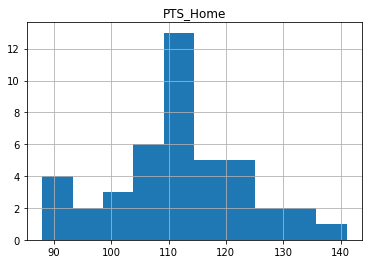

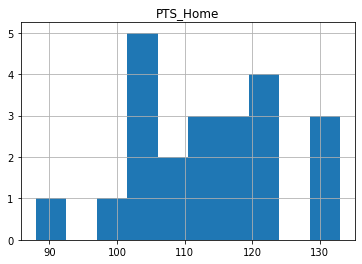

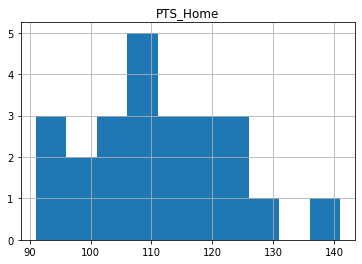

In [6]:
team = 'PHI'
against = 'DET'

get_match_stats(team, against) # DET over 107.5 -> 1.8

Average points of MIA 108.70731707317073
Std points of MIA 9.545270824966215

Average points of OKC 116.475
Std points of OKC 12.41790993603542

Average points of teams against MIA 116.7
Std points of teams against MIA 9.162912984361162

Average Pace of MIA 96.20230243902438
Average Pace of OKC 101.39472000000002

Average Points of MIA against OKC: 110.0
Average Points of OKC against MIA: 108.0

Average Pace of MIA against OKC: 95.3856

Average points of MIA when Home 109.55
Std points of MIA when Home 8.599112561311502
Average Pace of MIA when Home 95.36448000000001

Average points of OKC when Away 113.61111111111111
Std points of OKC when Away 12.58448572829862
Average PACE of OKC when Away 101.72586666666668



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away
841,2022-23,MIA,2022-12-14T00:00:00,W,48.0,37,86,0.43,24,56,0.429,12,15,0.8,7,32,39,25,14.0,9,1,4,21,16,110,2.0,1,1,1,1,91,965,702,945,3,4,224,1043,1090,527,928,664,890,541,493,256,1124,414,633,1025,750,547,OKC,Away,80.9,2022-23,OKC,2022-12-14T00:00:00,L,48.0,41,82,0.5,9,24,0.375,17,23,0.739,7,37,44,26,14.0,7,4,1,16,21,108,-2.0,1,611,611,611,91,603,959,343,929,1138,475,667,608,837,928,247,547,446,493,554,612,23,134,479,833,645,MIA,Home,91.29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,218,95.616,95.1552,95.3856,78,168,33,80,29,38,83,69,14,16,51,28.0,5,37,-4,4,15,32,-5,-8,-5,-5,0,2,-1,0.0,-3,5,0.5,0.5,0.46988,0.53012,0.463768,0.536232,0.5,0.5,13,32,0.236364,0.592593,0.654545,0.25,0.109091,0.157407,0.5625,0.4375,0.2,0.8,0.642857,0.5,115.043507,113.498789,112.951807,115.600619,1.018519,0.981818,92.6,92.12,0.593952,0.586192,1.324324,1.109756,67.567568,63.414634,1.724138,13.333333,82.051282,84.090909,15.909091,17.948718,9.458232,7.32095,13.133208,13.192612,11.733032,12.652905,82.0,85.4


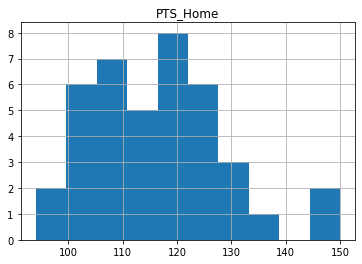

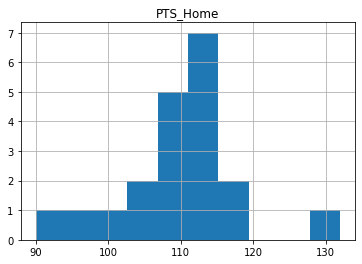

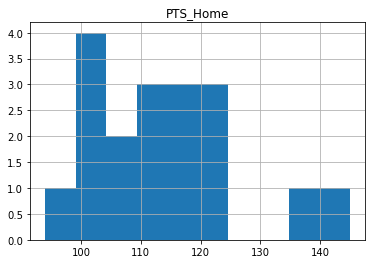

In [7]:
team = 'MIA'
against = 'OKC'

get_match_stats(team, against) # OKC under 110.5 -> 1.88

Average points of TOR 111.175
Std points of TOR 10.502472236427149

Average points of CHA 111.92682926829268
Std points of CHA 11.841432016235279

Average points of teams against TOR 118.14634146341463
Std points of teams against TOR 11.001274870690573

Average Pace of TOR 96.64751999999999
Average Pace of CHA 101.00511219512195

Average Points of TOR against CHA: nan
Average Points of CHA against TOR: nan

Average Pace of TOR against CHA: nan

Average points of TOR when Home 112.0
Std points of TOR when Home 10.47900395121234
Average Pace of TOR when Home 95.84465454545453

Average points of CHA when Away 114.04545454545455
Std points of CHA when Away 13.043799011050908
Average PACE of CHA when Away 101.9607272727273



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away


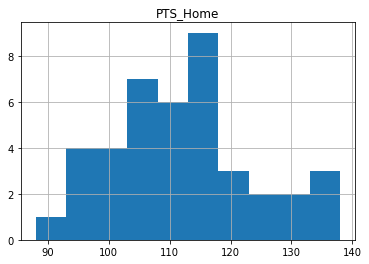

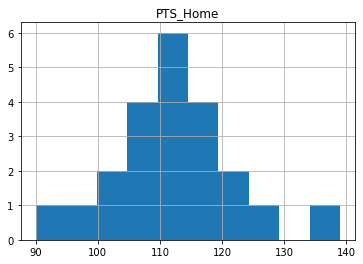

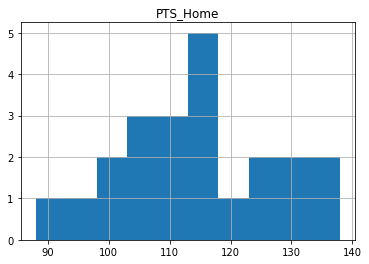

In [8]:
team = 'TOR'
against = 'CHA'

get_match_stats(team, against) # CHA under 111.5 -> 1.85

Average points of UTA 117.55813953488372
Std points of UTA 10.786460484773967

Average points of CLE 111.48780487804878
Std points of CLE 12.419987824509958

Average points of teams against UTA 106.5609756097561
Std points of teams against UTA 13.38478386169871

Average Pace of UTA 99.42920930232563
Average Pace of CLE 95.54809756097562

Average Points of UTA against CLE: 99.0
Average Points of CLE against UTA: 122.0

Average Pace of UTA against CLE: 97.2288

Average points of UTA when Home 121.15789473684211
Std points of UTA when Home 9.86161558712892
Average Pace of UTA when Home 100.60294736842103

Average points of CLE when Away 108.6842105263158
Std points of CLE when Away 12.880013076162044
Average PACE of CLE when Away 94.64488421052633



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away
916,2022-23,UTA,2022-12-19T00:00:00,L,48.0,36,93,0.387,10,34,0.294,17,23,0.739,15,20,35,19,14.0,9,2,4,22,20,99,-23.0,1,611,611,611,91,1035,259,1156,808,563,938,667,608,837,132,1211,1093,1054,493,256,988,414,743,589,1092,1164,CLE,Away,59.61,2022-23,CLE,2022-12-19T00:00:00,W,48.0,43,70,0.614,15,26,0.577,21,26,0.808,4,41,45,24,23.0,5,4,2,20,22,122,23.0,1,1,1,1,91,425,1214,9,244,1075,9,354,387,497,1149,72,467,647,1189,873,612,98,517,364,284,51,UTA,Home,98.31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221,98.0352,96.4224,97.2288,79,163,25,60,38,49,80,61,19,14,43,37.0,6,42,-7,23,-5,8,-4,-3,-10,-21,11,4,-5,-9.0,-2,2,0.378378,0.621622,0.4375,0.5625,0.327869,0.672131,0.789474,0.210526,26,28,0.525253,0.459016,0.30303,0.368852,0.171717,0.172131,0.642857,0.357143,0.333333,0.666667,0.642857,0.217391,100.984136,126.526616,124.445097,102.673238,0.811475,1.232323,103.12,81.44,0.480023,0.749018,1.138889,1.174419,52.777778,55.813953,4.545455,6.779661,83.333333,73.214286,26.785714,16.666667,9.333931,5.100209,11.953552,22.022214,10.554794,15.096521,61.9,94.1


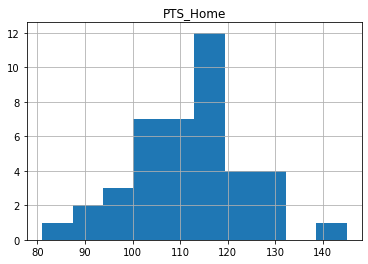

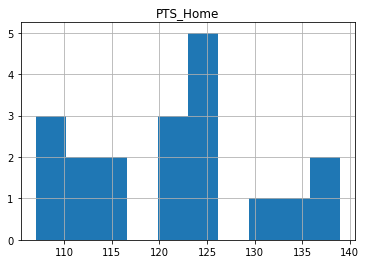

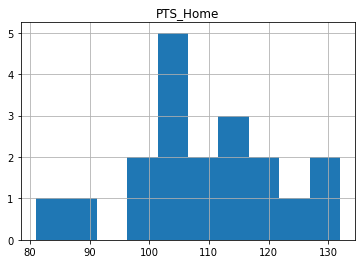

In [9]:
team = 'UTA'
against = 'CLE'

get_match_stats(team, against)# UTAH over 112.5 -> 1.85

Average points of GSW 116.75
Std points of GSW 11.479636374121407

Average points of PHX 112.73170731707317
Std points of PHX 13.525946159592502

Average points of teams against GSW 111.0
Std points of teams against GSW 11.800423721205947

Average Pace of GSW 101.34864000000002
Average Pace of PHX 96.65467317073168

Average Points of GSW against PHX: 112.0
Average Points of PHX against GSW: 132.0

Average Pace of GSW against PHX: 102.46079999999999

Average points of GSW when Home 119.47619047619048
Std points of GSW when Home 9.973058947078611
Average Pace of GSW when Home 101.8678857142857

Average points of PHX when Away 111.2
Std points of PHX when Away 15.174771306696067
Average PACE of PHX when Away 96.52896



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away
421,2022-23,GSW,2022-11-16T00:00:00,L,48.0,42,92,0.457,18,42,0.429,17,17,1.000,6,34,40,30,17.0,5,3,8,23,22,119,-11.0,1,611,611,611,91,500,324,735,75,162,224,667,996,1,1028,481,829,159,847,873,808,1066,858,364,379,961,PHX,Away,85.80,2022-23,PHX,2022-11-16T00:00:00,W,48.0,44,86,0.512,21,40,0.525,21,25,0.840,8,39,47,33,16.0,5,8,3,22,23,130,11.0,1,1,1,1,91,341,702,278,18,220,27,354,465,336,819,147,337,42,739,873,89,234,743,269,89,229,GSW,Home,113.92,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,249,106.0608,100.8000,103.4304,86,178,39,82,38,42,87,73,14,10,63,33.0,11,45,-2,6,-3,2,-4,-8,-7,-5,-2,0,-3,1.0,-5,1,0.515152,0.484848,0.459770,0.540230,0.465753,0.534247,0.428571,0.571429,24,23,0.403361,0.353846,0.453782,0.484615,0.142857,0.161538,0.500000,0.500000,0.272727,0.727273,0.294118,0.312500,112.199795,128.968254,122.571204,118.055556,0.915385,1.092437,99.48,97.00,0.598110,0.670103,1.214286,1.238636,71.428571,75.000000,6.521739,16.000000,80.952381,86.666667,13.333333,19.047619,4.960317,4.714277,14.59478,14.159292,12.284409,13.561278,85.6,106.4
104,2022-23,GSW,2022-10-25T00:00:00,L,48.0,41,91

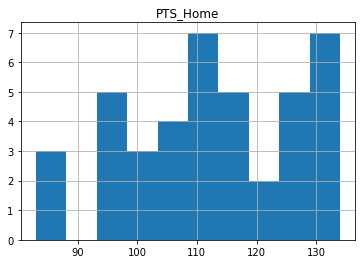

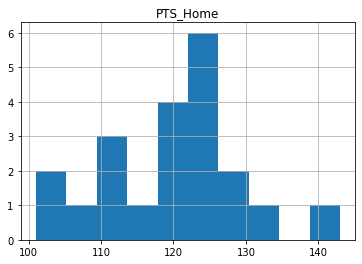

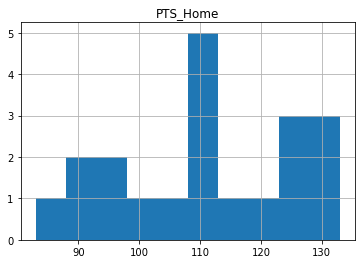

In [10]:
team = 'GSW'
against = 'PHX'

get_match_stats(team, against) # PHX over 108.5 -> 1.88

Average points of POR 112.2051282051282
Std points of POR 11.603491958933123

Average points of ORL 110.4390243902439
Std points of ORL 10.751857468567476

Average points of teams against POR 114.41463414634147
Std points of teams against POR 11.777044641496644

Average Pace of POR 96.72369230769232
Average Pace of ORL 97.77529756097559

Average Points of POR against ORL: nan
Average Points of ORL against POR: nan

Average Pace of POR against ORL: nan

Average points of POR when Home 118.53333333333333
Std points of POR when Home 10.95358171471562
Average Pace of POR when Home 98.55359999999999

Average points of ORL when Away 106.47368421052632
Std points of ORL when Away 8.526875297503844
Average PACE of ORL when Away 97.34602105263157



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away


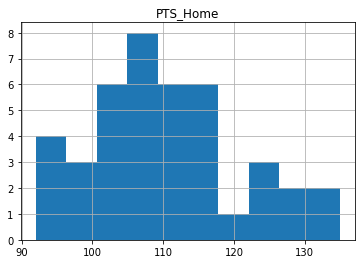

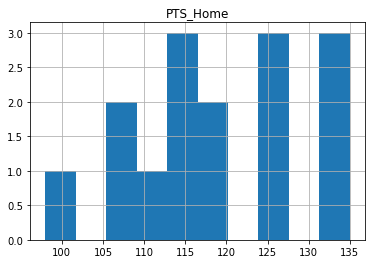

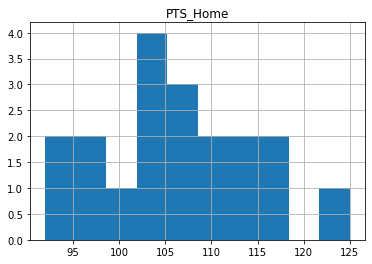

In [11]:
team = 'POR'
against = 'ORL'

get_match_stats(team, against)# ORL under 111.5 -> 1.83

Average points of LAC 109.14285714285714
Std points of LAC 11.400837428744218

Average points of DAL 112.41463414634147
Std points of DAL 12.50395059522409

Average points of teams against LAC 111.0
Std points of teams against LAC 10.931605554537724

Average Pace of LAC 96.91565714285716
Average Pace of DAL 95.51953170731706

Average Points of LAC against DAL: 101.0
Average Points of DAL against LAC: 103.0

Average Pace of LAC against DAL: 90.24

Average points of LAC when Home 105.2
Std points of LAC when Home 10.665241132813296
Average Pace of LAC when Home 96.10656000000003

Average points of DAL when Away 110.94736842105263
Std points of DAL when Away 10.260353492992802
Average PACE of DAL when Away 95.32395789473685



,SEASON_YEAR_Home,TEAM_Home,DATE_Home,W/L_Home,MIN_Home,FGM_Home,FGA_Home,FG%_Home,3PM_Home,3PA_Home,3P%_Home,FTM_Home,FTA_Home,FT%_Home,OREB_Home,DREB_Home,REB_Home,AST_Home,TOV_Home,STL_Home,BLK_Home,BLKA_Home,PF_Home,PFD_Home,PTS_Home,+/-_Home,GP_RANK_Home,W_RANK_Home,L_RANK_Home,W_PCT_RANK_Home,MIN_RANK_Home,FGM_RANK_Home,FGA_RANK_Home,FG_PCT_RANK_Home,FG3M_RANK_Home,FG3A_RANK_Home,FG3_PCT_RANK_Home,FTM_RANK_Home,FTA_RANK_Home,FT_PCT_RANK_Home,OREB_RANK_Home,DREB_RANK_Home,REB_RANK_Home,AST_RANK_Home,TOV_RANK_Home,STL_RANK_Home,BLK_RANK_Home,BLKA_RANK_Home,PF_RANK_Home,PFD_RANK_Home,PTS_RANK_Home,PLUS_MINUS_RANK_Home,OPPONENT_Home,VENUE_Home,VALUE_Home,SEASON_YEAR_Away,TEAM_Away,DATE_Away,W/L_Away,MIN_Away,FGM_Away,FGA_Away,FG%_Away,3PM_Away,3PA_Away,3P%_Away,FTM_Away,FTA_Away,FT%_Away,OREB_Away,DREB_Away,REB_Away,AST_Away,TOV_Away,STL_Away,BLK_Away,BLKA_Away,PF_Away,PFD_Away,PTS_Away,+/-_Away,GP_RANK_Away,W_RANK_Away,L_RANK_Away,W_PCT_RANK_Away,MIN_RANK_Away,FGM_RANK_Away,FGA_RANK_Away,FG_PCT_RANK_Away,FG3M_RANK_Away,FG3A_RANK_Away,FG3_PCT_RANK_Away,FTM_RANK_Away,FTA_RANK_Away,FT_PCT_RANK_Away,OREB_RANK_Away,DREB_RANK_Away,REB_RANK_Away,AST_RANK_Away,TOV_RANK_Away,STL_RANK_Away,BLK_RANK_Away,BLKA_RANK_Away,PF_RANK_Away,PFD_RANK_Away,PTS_RANK_Away,PLUS_MINUS_RANK_Away,OPPONENT_Away,VENUE_Away,VALUE_Away,venue_Away,venue_Home,team_ATL,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,PTS,POSSESION_Home,POSSESION_Away,PACE,tot_FGM,tot_FGA,tot_3PM,tot_3PA,tot_FTM,tot_FTA,tot_REB,tot_DREB,tot_OREB,tot_STL,tot_AST,tot_TOV,tot_BLK,tot_PF,diff_FGM,diff_FGA,diff_3PM,diff_3PA,diff_FTM,diff_FTA,diff_REB,diff_DREB,diff_OREB,diff_STL,diff_AST,diff_TOV,diff_BLK,diff_PF,TOVg%_Home,TOVg%_Away,REBg%_Home,REBg%_Away,DREBg%_Home,DREBg%_Away,OREBg%_Home,OREBg%_Away,2PM_Home,2PM_Away,2PM%_Home,2PM%_Away,3PM%_Home,3PM%_Away,FTM%_Home,FTM%_Away,STLg%_Home,STLg%_Away,BLKg%_Home,BLKg%_Away,STL/TOV_Home,STL/TOV_Away,OFF_RTG_Home,OFF_RTG_Away,DEF_RTG_Home,DEF_RTG_Away,NET_RTG_Home,NET_RTG_Away,TSA_Home,TSA_Away,TS%_Home,TS%_Away,eFG%_Home,eFG%_Away,AST%_Home,AST%_Away,BLK%_Home,BLK%_Away,DREB%_Home,DREB%_Away,OREB%_Home,OREB%_Away,STL%_Home,STL%_Away,TOV%_Home,TOV%_Away,FF_Home,FF_Away,GS_Home,GS_Away
419,2022-23,LAC,2022-11-15T00:00:00,L,48.0,34,64,0.531,12,28,0.429,21,26,0.808,3,37,40,23,21.0,8,2,1,27,20,101,-2.0,1,611,611,611,91,1125,1220,180,525,966,224,354,387,497,1199,247,829,740,1142,390,988,23,1135,589,1044,645,DAL,Away,70.07,2022-23,DAL,2022-11-15T00:00:00,W,48.0,35,80,0.438,17,43,0.395,16,24,0.667,8,26,34,20,12.0,12,1,2,20,27,103,2.0,1,1,1,1,91,1091,1059,884,114,131,379,749,534,1050,819,1090,1130,987,260,59,1124,98,517,61,994,547,LAC,Home,76.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,89.7024,90.7776,90.24,69,144,29,71,37,50,74,63,11,20,43,33.0,3,47,-1,-16,-5,-15,5,2,6,11,-5,-4,3,9.0,1,7,0.636364,0.363636,0.540541,0.459459,0.587302,0.412698,0.272727,0.727273,22,18,0.435644,0.349515,0.356436,0.495146,0.207921,0.15534,0.4,0.6,0.666667,0.333333,0.380952,1.0,112.594535,113.464114,114.82413,111.260928,0.980583,1.019802,75.44,90.56,0.669406,0.568684,1.176471,1.242857,67.647059,57.142857,5.405405,2.777778,82.222222,89.655172,10.344828,17.777778,8.812747,13.377568,21.775197,11.700468,14.035587,10.32231,73.3,77.2


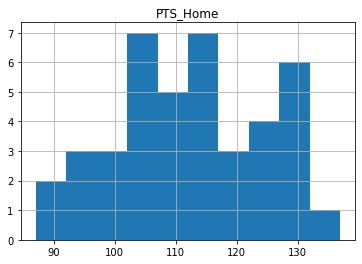

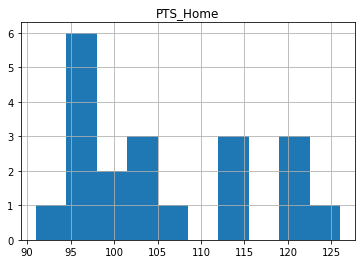

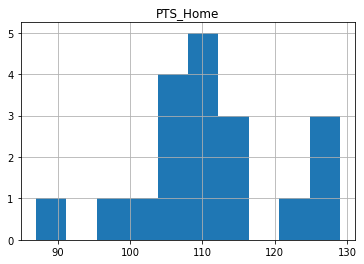

In [12]:
team = 'LAC'
against = 'DAL'

get_match_stats(team, against)# LAC under 111.5 -> 1.8